### ROC

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

root_path = "../output/ablation"
class_label_to_calculate = 1
metric_list = os.listdir(root_path)
metric_list = ['no edge.npz', 'no resval.npz', 'no l2.npz','no fm.npz','total.npz']
def calculate_metrics(file_path, class_label=1):
    # Load the saved data
    loaded_data = np.load(file_path)

    # Access the saved arrays using the corresponding keys
    if 'label' in list(loaded_data.keys()):
        labels = loaded_data['label']
        probabilities = loaded_data['prob']
    elif 'labels' in list(loaded_data.keys()):
        labels = loaded_data['labels']
        probabilities = loaded_data['predictions']    
    elif 'groundtruth' in list(loaded_data.keys()):
        labels = loaded_data['groundtruth']
        probabilities = loaded_data['predict']
    # Calculate predicted labels
    if len(probabilities.shape) >= 2:
        predicted_labels = np.argmax(probabilities, axis=1)
    else:
        predicted_labels = probabilities

    if len(labels.shape) >= 2:
        labels = np.argmax(labels, axis=1)
    else:
        labels = labels

    # Calculate precision, recall, and F1-score for the specified class
    precision = precision_score(labels, predicted_labels, pos_label=class_label)
    recall = recall_score(labels, predicted_labels, pos_label=class_label)
    f1 = f1_score(labels, predicted_labels, pos_label=class_label)


    return precision, recall, f1

In [2]:
# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Precision', 'Recall', 'F1-Score'])

# Function to calculate metrics and update the DataFrame
def update_result_df(file_path, class_label=1):
    precision, recall, f1 = calculate_metrics(file_path, class_label)
    return pd.Series({'Precision': precision, 'Recall': recall, 'F1-Score': f1})

# Iterate through each file in metric_list
for metric_file in metric_list:
    file_path = os.path.join(root_path, metric_file)

    # Skip non-npz files
    if not metric_file.endswith('.npz'):
        continue

    # Calculate metrics and append the results to the DataFrame
    result_df.loc[metric_file.replace(".npz", "")] = update_result_df(file_path, class_label_to_calculate)
result_df.to_csv("result/ablation.csv")
result_df

,Precision,Recall,F1-Score
no edge,0.820896,0.833333,0.827068
no resval,0.808219,0.893939,0.848921
no l2,0.951613,0.893939,0.921875
no fm,0.950820,0.878788,0.913386
total,0.983607,0.909091,0.944882


In [3]:
metric_list

['no edge.npz', 'no resval.npz', 'no l2.npz', 'no fm.npz', 'total.npz']

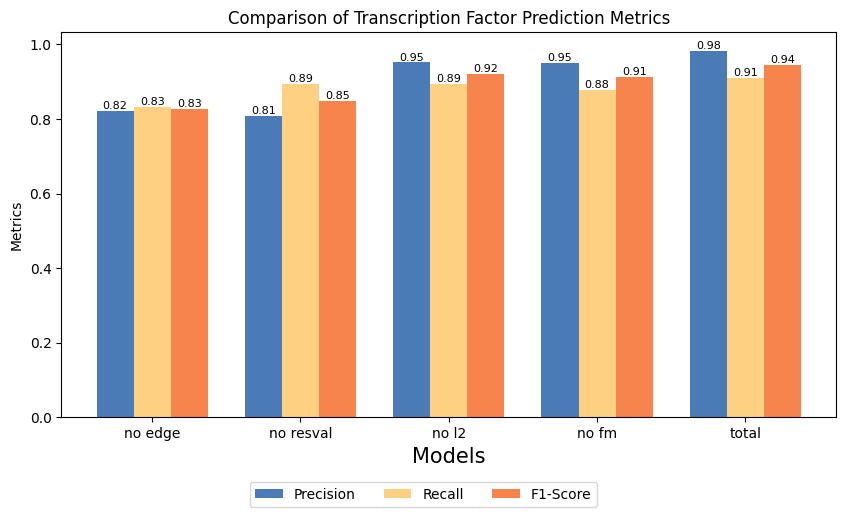

In [4]:
import matplotlib.pyplot as plt

# Index representing the models
models = [x.replace(".npz","") for x in metric_list]

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.25
bar_positions = [i for i in range(len(models))]
colors = ['#4A7BB7', '#FED081', '#F7834D']
for i, metric in enumerate(['Precision', 'Recall', 'F1-Score']):
    bars = ax.bar([pos + i * bar_width for pos in bar_positions], result_df[metric], width=bar_width, label=metric, color=colors[i])
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)
        
# Customize plot
ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(models)
ax.set_xlabel('Models',size=15)
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Transcription Factor Prediction Metrics')
ax.legend(bbox_to_anchor=(0.7, -0.15),ncol=3)
plt.savefig("plot/ablation.png", dpi=300)
plt.show()